In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
xls_data=pd.read_excel("./table.xlsx")

In [3]:
t2_dat=xls_data.loc[:,"# of turns":"HFSS"]

In [4]:
t3_dat=xls_data.loc[:,"# of turns.1":"HFSS.1"]

In [5]:
t4_dat=xls_data.loc[:,"# of turns.2":"HFSS.2"]

In [6]:
t2_dat=t2_dat.replace(np.nan,0)
t3_dat=t3_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)

In [7]:
def data_restore(dat):
    for col_name in dat.columns[:5]:
        temp=0
        for i in range(len(dat[col_name])):
            if (dat.loc[i,col_name]!=0):
                temp=dat.loc[i,col_name]
            if (dat.loc[i,col_name]==0):
                dat.loc[i,col_name]=temp
    return dat

In [8]:
t2_dat=data_restore(t2_dat)
t3_dat=data_restore(t3_dat)
t4_dat=data_restore(t4_dat)

In [9]:
total_dat_temp=np.vstack([t2_dat.values,t3_dat.values,t4_dat.values])

In [10]:
del_index=np.where(total_dat_temp[:,6]==0)[0]

In [11]:
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)

In [12]:
total_dat=total_dat_temp.drop(del_index)

In [13]:
total_dat.to_csv("preprocessed_data.csv",
                 columns=total_dat.columns,sep=",", index=False)

In [14]:
data=total_dat.values

In [15]:
log_dat_x=np.log(data[:,:6])

In [16]:
pow_dat_x=np.power(data[:,:6],2)

In [17]:
log_dat_y=np.log(data[:,6])

In [18]:
x_train=np.hstack([log_dat_x,data[:,:6],pow_dat_x])

In [19]:
mean_x=np.mean(x_train, axis=0)
std_x=np.std(x_train, axis=0)

In [20]:
x_train=(x_train - mean_x) / std_x

In [21]:
mean_y=np.mean(log_dat_y)
std_y=np.std(log_dat_y)

In [22]:
y_train=(log_dat_y-mean_y)/std_y

In [23]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)

In [24]:
model=nn.Linear(18,1)

In [25]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1757,  0.0428, -0.1705, -0.1042, -0.0024, -0.0200, -0.0799,  0.0617,
          0.0258,  0.2213, -0.0251,  0.1854,  0.1788,  0.1882,  0.0136, -0.1718,
         -0.1764, -0.0518]], requires_grad=True), Parameter containing:
tensor([0.1492], requires_grad=True)]


In [26]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [27]:
nb_epochs = 1000000
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    cost = F.mse_loss(prediction, y_train) 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/1000000 Cost: 1.323084
Epoch  100/1000000 Cost: 1.309608
Epoch  200/1000000 Cost: 1.296286
Epoch  300/1000000 Cost: 1.283118
Epoch  400/1000000 Cost: 1.270100
Epoch  500/1000000 Cost: 1.257232
Epoch  600/1000000 Cost: 1.244512
Epoch  700/1000000 Cost: 1.231937
Epoch  800/1000000 Cost: 1.219507
Epoch  900/1000000 Cost: 1.207218
Epoch 1000/1000000 Cost: 1.195071
Epoch 1100/1000000 Cost: 1.183063
Epoch 1200/1000000 Cost: 1.171193
Epoch 1300/1000000 Cost: 1.159457
Epoch 1400/1000000 Cost: 1.147856
Epoch 1500/1000000 Cost: 1.136388
Epoch 1600/1000000 Cost: 1.125051
Epoch 1700/1000000 Cost: 1.113844
Epoch 1800/1000000 Cost: 1.102765
Epoch 1900/1000000 Cost: 1.091812
Epoch 2000/1000000 Cost: 1.080984
Epoch 2100/1000000 Cost: 1.070279
Epoch 2200/1000000 Cost: 1.059696
Epoch 2300/1000000 Cost: 1.049235
Epoch 2400/1000000 Cost: 1.038892
Epoch 2500/1000000 Cost: 1.028667
Epoch 2600/1000000 Cost: 1.018559
Epoch 2700/1000000 Cost: 1.008566
Epoch 2800/1000000 Cost: 0.998686
Epoch 2900/100

Epoch 23800/1000000 Cost: 0.202738
Epoch 23900/1000000 Cost: 0.201737
Epoch 24000/1000000 Cost: 0.200746
Epoch 24100/1000000 Cost: 0.199765
Epoch 24200/1000000 Cost: 0.198793
Epoch 24300/1000000 Cost: 0.197832
Epoch 24400/1000000 Cost: 0.196880
Epoch 24500/1000000 Cost: 0.195938
Epoch 24600/1000000 Cost: 0.195005
Epoch 24700/1000000 Cost: 0.194081
Epoch 24800/1000000 Cost: 0.193167
Epoch 24900/1000000 Cost: 0.192261
Epoch 25000/1000000 Cost: 0.191365
Epoch 25100/1000000 Cost: 0.190477
Epoch 25200/1000000 Cost: 0.189599
Epoch 25300/1000000 Cost: 0.188729
Epoch 25400/1000000 Cost: 0.187868
Epoch 25500/1000000 Cost: 0.187015
Epoch 25600/1000000 Cost: 0.186170
Epoch 25700/1000000 Cost: 0.185334
Epoch 25800/1000000 Cost: 0.184506
Epoch 25900/1000000 Cost: 0.183687
Epoch 26000/1000000 Cost: 0.182875
Epoch 26100/1000000 Cost: 0.182071
Epoch 26200/1000000 Cost: 0.181276
Epoch 26300/1000000 Cost: 0.180488
Epoch 26400/1000000 Cost: 0.179707
Epoch 26500/1000000 Cost: 0.178935
Epoch 26600/1000000 

Epoch 47300/1000000 Cost: 0.106834
Epoch 47400/1000000 Cost: 0.106697
Epoch 47500/1000000 Cost: 0.106560
Epoch 47600/1000000 Cost: 0.106425
Epoch 47700/1000000 Cost: 0.106291
Epoch 47800/1000000 Cost: 0.106157
Epoch 47900/1000000 Cost: 0.106024
Epoch 48000/1000000 Cost: 0.105892
Epoch 48100/1000000 Cost: 0.105761
Epoch 48200/1000000 Cost: 0.105630
Epoch 48300/1000000 Cost: 0.105500
Epoch 48400/1000000 Cost: 0.105372
Epoch 48500/1000000 Cost: 0.105244
Epoch 48600/1000000 Cost: 0.105117
Epoch 48700/1000000 Cost: 0.104990
Epoch 48800/1000000 Cost: 0.104864
Epoch 48900/1000000 Cost: 0.104739
Epoch 49000/1000000 Cost: 0.104615
Epoch 49100/1000000 Cost: 0.104491
Epoch 49200/1000000 Cost: 0.104368
Epoch 49300/1000000 Cost: 0.104247
Epoch 49400/1000000 Cost: 0.104125
Epoch 49500/1000000 Cost: 0.104005
Epoch 49600/1000000 Cost: 0.103884
Epoch 49700/1000000 Cost: 0.103765
Epoch 49800/1000000 Cost: 0.103647
Epoch 49900/1000000 Cost: 0.103529
Epoch 50000/1000000 Cost: 0.103411
Epoch 50100/1000000 

Epoch 71500/1000000 Cost: 0.087161
Epoch 71600/1000000 Cost: 0.087108
Epoch 71700/1000000 Cost: 0.087055
Epoch 71800/1000000 Cost: 0.087003
Epoch 71900/1000000 Cost: 0.086950
Epoch 72000/1000000 Cost: 0.086898
Epoch 72100/1000000 Cost: 0.086846
Epoch 72200/1000000 Cost: 0.086793
Epoch 72300/1000000 Cost: 0.086741
Epoch 72400/1000000 Cost: 0.086689
Epoch 72500/1000000 Cost: 0.086637
Epoch 72600/1000000 Cost: 0.086585
Epoch 72700/1000000 Cost: 0.086533
Epoch 72800/1000000 Cost: 0.086482
Epoch 72900/1000000 Cost: 0.086431
Epoch 73000/1000000 Cost: 0.086380
Epoch 73100/1000000 Cost: 0.086329
Epoch 73200/1000000 Cost: 0.086278
Epoch 73300/1000000 Cost: 0.086227
Epoch 73400/1000000 Cost: 0.086176
Epoch 73500/1000000 Cost: 0.086125
Epoch 73600/1000000 Cost: 0.086075
Epoch 73700/1000000 Cost: 0.086024
Epoch 73800/1000000 Cost: 0.085973
Epoch 73900/1000000 Cost: 0.085922
Epoch 74000/1000000 Cost: 0.085872
Epoch 74100/1000000 Cost: 0.085822
Epoch 74200/1000000 Cost: 0.085772
Epoch 74300/1000000 

Epoch 95600/1000000 Cost: 0.076560
Epoch 95700/1000000 Cost: 0.076522
Epoch 95800/1000000 Cost: 0.076484
Epoch 95900/1000000 Cost: 0.076446
Epoch 96000/1000000 Cost: 0.076409
Epoch 96100/1000000 Cost: 0.076371
Epoch 96200/1000000 Cost: 0.076333
Epoch 96300/1000000 Cost: 0.076295
Epoch 96400/1000000 Cost: 0.076257
Epoch 96500/1000000 Cost: 0.076219
Epoch 96600/1000000 Cost: 0.076182
Epoch 96700/1000000 Cost: 0.076144
Epoch 96800/1000000 Cost: 0.076106
Epoch 96900/1000000 Cost: 0.076069
Epoch 97000/1000000 Cost: 0.076031
Epoch 97100/1000000 Cost: 0.075993
Epoch 97200/1000000 Cost: 0.075956
Epoch 97300/1000000 Cost: 0.075918
Epoch 97400/1000000 Cost: 0.075881
Epoch 97500/1000000 Cost: 0.075843
Epoch 97600/1000000 Cost: 0.075806
Epoch 97700/1000000 Cost: 0.075768
Epoch 97800/1000000 Cost: 0.075731
Epoch 97900/1000000 Cost: 0.075693
Epoch 98000/1000000 Cost: 0.075656
Epoch 98100/1000000 Cost: 0.075618
Epoch 98200/1000000 Cost: 0.075581
Epoch 98300/1000000 Cost: 0.075544
Epoch 98400/1000000 

Epoch 119100/1000000 Cost: 0.068445
Epoch 119200/1000000 Cost: 0.068414
Epoch 119300/1000000 Cost: 0.068383
Epoch 119400/1000000 Cost: 0.068351
Epoch 119500/1000000 Cost: 0.068320
Epoch 119600/1000000 Cost: 0.068289
Epoch 119700/1000000 Cost: 0.068257
Epoch 119800/1000000 Cost: 0.068226
Epoch 119900/1000000 Cost: 0.068195
Epoch 120000/1000000 Cost: 0.068164
Epoch 120100/1000000 Cost: 0.068132
Epoch 120200/1000000 Cost: 0.068101
Epoch 120300/1000000 Cost: 0.068070
Epoch 120400/1000000 Cost: 0.068039
Epoch 120500/1000000 Cost: 0.068007
Epoch 120600/1000000 Cost: 0.067976
Epoch 120700/1000000 Cost: 0.067945
Epoch 120800/1000000 Cost: 0.067914
Epoch 120900/1000000 Cost: 0.067883
Epoch 121000/1000000 Cost: 0.067851
Epoch 121100/1000000 Cost: 0.067820
Epoch 121200/1000000 Cost: 0.067789
Epoch 121300/1000000 Cost: 0.067758
Epoch 121400/1000000 Cost: 0.067727
Epoch 121500/1000000 Cost: 0.067696
Epoch 121600/1000000 Cost: 0.067665
Epoch 121700/1000000 Cost: 0.067634
Epoch 121800/1000000 Cost: 0

Epoch 142300/1000000 Cost: 0.061683
Epoch 142400/1000000 Cost: 0.061656
Epoch 142500/1000000 Cost: 0.061629
Epoch 142600/1000000 Cost: 0.061602
Epoch 142700/1000000 Cost: 0.061576
Epoch 142800/1000000 Cost: 0.061549
Epoch 142900/1000000 Cost: 0.061522
Epoch 143000/1000000 Cost: 0.061495
Epoch 143100/1000000 Cost: 0.061468
Epoch 143200/1000000 Cost: 0.061442
Epoch 143300/1000000 Cost: 0.061415
Epoch 143400/1000000 Cost: 0.061388
Epoch 143500/1000000 Cost: 0.061362
Epoch 143600/1000000 Cost: 0.061335
Epoch 143700/1000000 Cost: 0.061308
Epoch 143800/1000000 Cost: 0.061281
Epoch 143900/1000000 Cost: 0.061255
Epoch 144000/1000000 Cost: 0.061228
Epoch 144100/1000000 Cost: 0.061201
Epoch 144200/1000000 Cost: 0.061175
Epoch 144300/1000000 Cost: 0.061148
Epoch 144400/1000000 Cost: 0.061121
Epoch 144500/1000000 Cost: 0.061095
Epoch 144600/1000000 Cost: 0.061068
Epoch 144700/1000000 Cost: 0.061042
Epoch 144800/1000000 Cost: 0.061015
Epoch 144900/1000000 Cost: 0.060988
Epoch 145000/1000000 Cost: 0

Epoch 165500/1000000 Cost: 0.055861
Epoch 165600/1000000 Cost: 0.055838
Epoch 165700/1000000 Cost: 0.055814
Epoch 165800/1000000 Cost: 0.055791
Epoch 165900/1000000 Cost: 0.055767
Epoch 166000/1000000 Cost: 0.055744
Epoch 166100/1000000 Cost: 0.055720
Epoch 166200/1000000 Cost: 0.055697
Epoch 166300/1000000 Cost: 0.055673
Epoch 166400/1000000 Cost: 0.055650
Epoch 166500/1000000 Cost: 0.055626
Epoch 166600/1000000 Cost: 0.055603
Epoch 166700/1000000 Cost: 0.055579
Epoch 166800/1000000 Cost: 0.055556
Epoch 166900/1000000 Cost: 0.055533
Epoch 167000/1000000 Cost: 0.055510
Epoch 167100/1000000 Cost: 0.055487
Epoch 167200/1000000 Cost: 0.055464
Epoch 167300/1000000 Cost: 0.055442
Epoch 167400/1000000 Cost: 0.055419
Epoch 167500/1000000 Cost: 0.055396
Epoch 167600/1000000 Cost: 0.055374
Epoch 167700/1000000 Cost: 0.055351
Epoch 167800/1000000 Cost: 0.055328
Epoch 167900/1000000 Cost: 0.055306
Epoch 168000/1000000 Cost: 0.055283
Epoch 168100/1000000 Cost: 0.055260
Epoch 168200/1000000 Cost: 0

Epoch 188900/1000000 Cost: 0.050803
Epoch 189000/1000000 Cost: 0.050783
Epoch 189100/1000000 Cost: 0.050763
Epoch 189200/1000000 Cost: 0.050743
Epoch 189300/1000000 Cost: 0.050723
Epoch 189400/1000000 Cost: 0.050703
Epoch 189500/1000000 Cost: 0.050683
Epoch 189600/1000000 Cost: 0.050663
Epoch 189700/1000000 Cost: 0.050643
Epoch 189800/1000000 Cost: 0.050623
Epoch 189900/1000000 Cost: 0.050603
Epoch 190000/1000000 Cost: 0.050583
Epoch 190100/1000000 Cost: 0.050563
Epoch 190200/1000000 Cost: 0.050543
Epoch 190300/1000000 Cost: 0.050523
Epoch 190400/1000000 Cost: 0.050503
Epoch 190500/1000000 Cost: 0.050483
Epoch 190600/1000000 Cost: 0.050463
Epoch 190700/1000000 Cost: 0.050443
Epoch 190800/1000000 Cost: 0.050423
Epoch 190900/1000000 Cost: 0.050404
Epoch 191000/1000000 Cost: 0.050384
Epoch 191100/1000000 Cost: 0.050364
Epoch 191200/1000000 Cost: 0.050344
Epoch 191300/1000000 Cost: 0.050324
Epoch 191400/1000000 Cost: 0.050304
Epoch 191500/1000000 Cost: 0.050284
Epoch 191600/1000000 Cost: 0

Epoch 211800/1000000 Cost: 0.046503
Epoch 211900/1000000 Cost: 0.046485
Epoch 212000/1000000 Cost: 0.046468
Epoch 212100/1000000 Cost: 0.046450
Epoch 212200/1000000 Cost: 0.046433
Epoch 212300/1000000 Cost: 0.046415
Epoch 212400/1000000 Cost: 0.046397
Epoch 212500/1000000 Cost: 0.046380
Epoch 212600/1000000 Cost: 0.046362
Epoch 212700/1000000 Cost: 0.046345
Epoch 212800/1000000 Cost: 0.046327
Epoch 212900/1000000 Cost: 0.046310
Epoch 213000/1000000 Cost: 0.046293
Epoch 213100/1000000 Cost: 0.046275
Epoch 213200/1000000 Cost: 0.046258
Epoch 213300/1000000 Cost: 0.046240
Epoch 213400/1000000 Cost: 0.046223
Epoch 213500/1000000 Cost: 0.046205
Epoch 213600/1000000 Cost: 0.046188
Epoch 213700/1000000 Cost: 0.046170
Epoch 213800/1000000 Cost: 0.046153
Epoch 213900/1000000 Cost: 0.046135
Epoch 214000/1000000 Cost: 0.046118
Epoch 214100/1000000 Cost: 0.046101
Epoch 214200/1000000 Cost: 0.046083
Epoch 214300/1000000 Cost: 0.046066
Epoch 214400/1000000 Cost: 0.046048
Epoch 214500/1000000 Cost: 0

Epoch 235400/1000000 Cost: 0.042649
Epoch 235500/1000000 Cost: 0.042634
Epoch 235600/1000000 Cost: 0.042618
Epoch 235700/1000000 Cost: 0.042603
Epoch 235800/1000000 Cost: 0.042588
Epoch 235900/1000000 Cost: 0.042573
Epoch 236000/1000000 Cost: 0.042557
Epoch 236100/1000000 Cost: 0.042542
Epoch 236200/1000000 Cost: 0.042527
Epoch 236300/1000000 Cost: 0.042512
Epoch 236400/1000000 Cost: 0.042496
Epoch 236500/1000000 Cost: 0.042481
Epoch 236600/1000000 Cost: 0.042466
Epoch 236700/1000000 Cost: 0.042451
Epoch 236800/1000000 Cost: 0.042435
Epoch 236900/1000000 Cost: 0.042420
Epoch 237000/1000000 Cost: 0.042405
Epoch 237100/1000000 Cost: 0.042390
Epoch 237200/1000000 Cost: 0.042375
Epoch 237300/1000000 Cost: 0.042359
Epoch 237400/1000000 Cost: 0.042344
Epoch 237500/1000000 Cost: 0.042329
Epoch 237600/1000000 Cost: 0.042314
Epoch 237700/1000000 Cost: 0.042299
Epoch 237800/1000000 Cost: 0.042283
Epoch 237900/1000000 Cost: 0.042268
Epoch 238000/1000000 Cost: 0.042253
Epoch 238100/1000000 Cost: 0

Epoch 258900/1000000 Cost: 0.039321
Epoch 259000/1000000 Cost: 0.039308
Epoch 259100/1000000 Cost: 0.039294
Epoch 259200/1000000 Cost: 0.039281
Epoch 259300/1000000 Cost: 0.039268
Epoch 259400/1000000 Cost: 0.039254
Epoch 259500/1000000 Cost: 0.039241
Epoch 259600/1000000 Cost: 0.039228
Epoch 259700/1000000 Cost: 0.039215
Epoch 259800/1000000 Cost: 0.039201
Epoch 259900/1000000 Cost: 0.039188
Epoch 260000/1000000 Cost: 0.039175
Epoch 260100/1000000 Cost: 0.039161
Epoch 260200/1000000 Cost: 0.039148
Epoch 260300/1000000 Cost: 0.039135
Epoch 260400/1000000 Cost: 0.039122
Epoch 260500/1000000 Cost: 0.039108
Epoch 260600/1000000 Cost: 0.039095
Epoch 260700/1000000 Cost: 0.039082
Epoch 260800/1000000 Cost: 0.039069
Epoch 260900/1000000 Cost: 0.039055
Epoch 261000/1000000 Cost: 0.039042
Epoch 261100/1000000 Cost: 0.039029
Epoch 261200/1000000 Cost: 0.039016
Epoch 261300/1000000 Cost: 0.039003
Epoch 261400/1000000 Cost: 0.038989
Epoch 261500/1000000 Cost: 0.038976
Epoch 261600/1000000 Cost: 0

Epoch 282100/1000000 Cost: 0.036472
Epoch 282200/1000000 Cost: 0.036460
Epoch 282300/1000000 Cost: 0.036448
Epoch 282400/1000000 Cost: 0.036437
Epoch 282500/1000000 Cost: 0.036425
Epoch 282600/1000000 Cost: 0.036414
Epoch 282700/1000000 Cost: 0.036402
Epoch 282800/1000000 Cost: 0.036390
Epoch 282900/1000000 Cost: 0.036379
Epoch 283000/1000000 Cost: 0.036367
Epoch 283100/1000000 Cost: 0.036356
Epoch 283200/1000000 Cost: 0.036344
Epoch 283300/1000000 Cost: 0.036333
Epoch 283400/1000000 Cost: 0.036321
Epoch 283500/1000000 Cost: 0.036309
Epoch 283600/1000000 Cost: 0.036298
Epoch 283700/1000000 Cost: 0.036286
Epoch 283800/1000000 Cost: 0.036275
Epoch 283900/1000000 Cost: 0.036263
Epoch 284000/1000000 Cost: 0.036252
Epoch 284100/1000000 Cost: 0.036240
Epoch 284200/1000000 Cost: 0.036229
Epoch 284300/1000000 Cost: 0.036217
Epoch 284400/1000000 Cost: 0.036206
Epoch 284500/1000000 Cost: 0.036194
Epoch 284600/1000000 Cost: 0.036183
Epoch 284700/1000000 Cost: 0.036172
Epoch 284800/1000000 Cost: 0

Epoch 305200/1000000 Cost: 0.034006
Epoch 305300/1000000 Cost: 0.033996
Epoch 305400/1000000 Cost: 0.033986
Epoch 305500/1000000 Cost: 0.033975
Epoch 305600/1000000 Cost: 0.033965
Epoch 305700/1000000 Cost: 0.033955
Epoch 305800/1000000 Cost: 0.033945
Epoch 305900/1000000 Cost: 0.033935
Epoch 306000/1000000 Cost: 0.033925
Epoch 306100/1000000 Cost: 0.033915
Epoch 306200/1000000 Cost: 0.033905
Epoch 306300/1000000 Cost: 0.033895
Epoch 306400/1000000 Cost: 0.033885
Epoch 306500/1000000 Cost: 0.033875
Epoch 306600/1000000 Cost: 0.033865
Epoch 306700/1000000 Cost: 0.033855
Epoch 306800/1000000 Cost: 0.033845
Epoch 306900/1000000 Cost: 0.033835
Epoch 307000/1000000 Cost: 0.033825
Epoch 307100/1000000 Cost: 0.033815
Epoch 307200/1000000 Cost: 0.033805
Epoch 307300/1000000 Cost: 0.033795
Epoch 307400/1000000 Cost: 0.033785
Epoch 307500/1000000 Cost: 0.033775
Epoch 307600/1000000 Cost: 0.033765
Epoch 307700/1000000 Cost: 0.033755
Epoch 307800/1000000 Cost: 0.033745
Epoch 307900/1000000 Cost: 0

Epoch 328100/1000000 Cost: 0.031879
Epoch 328200/1000000 Cost: 0.031870
Epoch 328300/1000000 Cost: 0.031861
Epoch 328400/1000000 Cost: 0.031852
Epoch 328500/1000000 Cost: 0.031844
Epoch 328600/1000000 Cost: 0.031835
Epoch 328700/1000000 Cost: 0.031826
Epoch 328800/1000000 Cost: 0.031818
Epoch 328900/1000000 Cost: 0.031809
Epoch 329000/1000000 Cost: 0.031800
Epoch 329100/1000000 Cost: 0.031792
Epoch 329200/1000000 Cost: 0.031783
Epoch 329300/1000000 Cost: 0.031774
Epoch 329400/1000000 Cost: 0.031765
Epoch 329500/1000000 Cost: 0.031757
Epoch 329600/1000000 Cost: 0.031748
Epoch 329700/1000000 Cost: 0.031739
Epoch 329800/1000000 Cost: 0.031731
Epoch 329900/1000000 Cost: 0.031722
Epoch 330000/1000000 Cost: 0.031713
Epoch 330100/1000000 Cost: 0.031705
Epoch 330200/1000000 Cost: 0.031696
Epoch 330300/1000000 Cost: 0.031688
Epoch 330400/1000000 Cost: 0.031679
Epoch 330500/1000000 Cost: 0.031670
Epoch 330600/1000000 Cost: 0.031662
Epoch 330700/1000000 Cost: 0.031653
Epoch 330800/1000000 Cost: 0

Epoch 351300/1000000 Cost: 0.030001
Epoch 351400/1000000 Cost: 0.029994
Epoch 351500/1000000 Cost: 0.029986
Epoch 351600/1000000 Cost: 0.029979
Epoch 351700/1000000 Cost: 0.029971
Epoch 351800/1000000 Cost: 0.029963
Epoch 351900/1000000 Cost: 0.029956
Epoch 352000/1000000 Cost: 0.029949
Epoch 352100/1000000 Cost: 0.029941
Epoch 352200/1000000 Cost: 0.029934
Epoch 352300/1000000 Cost: 0.029926
Epoch 352400/1000000 Cost: 0.029919
Epoch 352500/1000000 Cost: 0.029911
Epoch 352600/1000000 Cost: 0.029904
Epoch 352700/1000000 Cost: 0.029896
Epoch 352800/1000000 Cost: 0.029889
Epoch 352900/1000000 Cost: 0.029881
Epoch 353000/1000000 Cost: 0.029874
Epoch 353100/1000000 Cost: 0.029866
Epoch 353200/1000000 Cost: 0.029859
Epoch 353300/1000000 Cost: 0.029851
Epoch 353400/1000000 Cost: 0.029844
Epoch 353500/1000000 Cost: 0.029837
Epoch 353600/1000000 Cost: 0.029829
Epoch 353700/1000000 Cost: 0.029822
Epoch 353800/1000000 Cost: 0.029814
Epoch 353900/1000000 Cost: 0.029807
Epoch 354000/1000000 Cost: 0

Epoch 374100/1000000 Cost: 0.028387
Epoch 374200/1000000 Cost: 0.028381
Epoch 374300/1000000 Cost: 0.028374
Epoch 374400/1000000 Cost: 0.028368
Epoch 374500/1000000 Cost: 0.028361
Epoch 374600/1000000 Cost: 0.028355
Epoch 374700/1000000 Cost: 0.028349
Epoch 374800/1000000 Cost: 0.028342
Epoch 374900/1000000 Cost: 0.028336
Epoch 375000/1000000 Cost: 0.028329
Epoch 375100/1000000 Cost: 0.028323
Epoch 375200/1000000 Cost: 0.028316
Epoch 375300/1000000 Cost: 0.028310
Epoch 375400/1000000 Cost: 0.028303
Epoch 375500/1000000 Cost: 0.028297
Epoch 375600/1000000 Cost: 0.028291
Epoch 375700/1000000 Cost: 0.028284
Epoch 375800/1000000 Cost: 0.028278
Epoch 375900/1000000 Cost: 0.028271
Epoch 376000/1000000 Cost: 0.028265
Epoch 376100/1000000 Cost: 0.028259
Epoch 376200/1000000 Cost: 0.028252
Epoch 376300/1000000 Cost: 0.028246
Epoch 376400/1000000 Cost: 0.028239
Epoch 376500/1000000 Cost: 0.028233
Epoch 376600/1000000 Cost: 0.028227
Epoch 376700/1000000 Cost: 0.028220
Epoch 376800/1000000 Cost: 0

Epoch 397400/1000000 Cost: 0.026953
Epoch 397500/1000000 Cost: 0.026947
Epoch 397600/1000000 Cost: 0.026941
Epoch 397700/1000000 Cost: 0.026935
Epoch 397800/1000000 Cost: 0.026930
Epoch 397900/1000000 Cost: 0.026924
Epoch 398000/1000000 Cost: 0.026918
Epoch 398100/1000000 Cost: 0.026912
Epoch 398200/1000000 Cost: 0.026906
Epoch 398300/1000000 Cost: 0.026900
Epoch 398400/1000000 Cost: 0.026894
Epoch 398500/1000000 Cost: 0.026889
Epoch 398600/1000000 Cost: 0.026883
Epoch 398700/1000000 Cost: 0.026877
Epoch 398800/1000000 Cost: 0.026871
Epoch 398900/1000000 Cost: 0.026865
Epoch 399000/1000000 Cost: 0.026859
Epoch 399100/1000000 Cost: 0.026854
Epoch 399200/1000000 Cost: 0.026848
Epoch 399300/1000000 Cost: 0.026842
Epoch 399400/1000000 Cost: 0.026836
Epoch 399500/1000000 Cost: 0.026830
Epoch 399600/1000000 Cost: 0.026824
Epoch 399700/1000000 Cost: 0.026819
Epoch 399800/1000000 Cost: 0.026813
Epoch 399900/1000000 Cost: 0.026807
Epoch 400000/1000000 Cost: 0.026801
Epoch 400100/1000000 Cost: 0

Epoch 420400/1000000 Cost: 0.025734
Epoch 420500/1000000 Cost: 0.025729
Epoch 420600/1000000 Cost: 0.025724
Epoch 420700/1000000 Cost: 0.025719
Epoch 420800/1000000 Cost: 0.025714
Epoch 420900/1000000 Cost: 0.025709
Epoch 421000/1000000 Cost: 0.025704
Epoch 421100/1000000 Cost: 0.025699
Epoch 421200/1000000 Cost: 0.025694
Epoch 421300/1000000 Cost: 0.025689
Epoch 421400/1000000 Cost: 0.025684
Epoch 421500/1000000 Cost: 0.025679
Epoch 421600/1000000 Cost: 0.025674
Epoch 421700/1000000 Cost: 0.025669
Epoch 421800/1000000 Cost: 0.025664
Epoch 421900/1000000 Cost: 0.025659
Epoch 422000/1000000 Cost: 0.025654
Epoch 422100/1000000 Cost: 0.025649
Epoch 422200/1000000 Cost: 0.025644
Epoch 422300/1000000 Cost: 0.025639
Epoch 422400/1000000 Cost: 0.025634
Epoch 422500/1000000 Cost: 0.025629
Epoch 422600/1000000 Cost: 0.025624
Epoch 422700/1000000 Cost: 0.025619
Epoch 422800/1000000 Cost: 0.025614
Epoch 422900/1000000 Cost: 0.025610
Epoch 423000/1000000 Cost: 0.025605
Epoch 423100/1000000 Cost: 0

Epoch 443700/1000000 Cost: 0.024643
Epoch 443800/1000000 Cost: 0.024638
Epoch 443900/1000000 Cost: 0.024634
Epoch 444000/1000000 Cost: 0.024630
Epoch 444100/1000000 Cost: 0.024626
Epoch 444200/1000000 Cost: 0.024621
Epoch 444300/1000000 Cost: 0.024617
Epoch 444400/1000000 Cost: 0.024613
Epoch 444500/1000000 Cost: 0.024609
Epoch 444600/1000000 Cost: 0.024604
Epoch 444700/1000000 Cost: 0.024600
Epoch 444800/1000000 Cost: 0.024596
Epoch 444900/1000000 Cost: 0.024592
Epoch 445000/1000000 Cost: 0.024587
Epoch 445100/1000000 Cost: 0.024583
Epoch 445200/1000000 Cost: 0.024579
Epoch 445300/1000000 Cost: 0.024575
Epoch 445400/1000000 Cost: 0.024571
Epoch 445500/1000000 Cost: 0.024566
Epoch 445600/1000000 Cost: 0.024562
Epoch 445700/1000000 Cost: 0.024558
Epoch 445800/1000000 Cost: 0.024554
Epoch 445900/1000000 Cost: 0.024550
Epoch 446000/1000000 Cost: 0.024545
Epoch 446100/1000000 Cost: 0.024541
Epoch 446200/1000000 Cost: 0.024537
Epoch 446300/1000000 Cost: 0.024533
Epoch 446400/1000000 Cost: 0

Epoch 467200/1000000 Cost: 0.023694
Epoch 467300/1000000 Cost: 0.023690
Epoch 467400/1000000 Cost: 0.023687
Epoch 467500/1000000 Cost: 0.023683
Epoch 467600/1000000 Cost: 0.023679
Epoch 467700/1000000 Cost: 0.023675
Epoch 467800/1000000 Cost: 0.023671
Epoch 467900/1000000 Cost: 0.023667
Epoch 468000/1000000 Cost: 0.023664
Epoch 468100/1000000 Cost: 0.023660
Epoch 468200/1000000 Cost: 0.023656
Epoch 468300/1000000 Cost: 0.023652
Epoch 468400/1000000 Cost: 0.023648
Epoch 468500/1000000 Cost: 0.023644
Epoch 468600/1000000 Cost: 0.023641
Epoch 468700/1000000 Cost: 0.023637
Epoch 468800/1000000 Cost: 0.023633
Epoch 468900/1000000 Cost: 0.023629
Epoch 469000/1000000 Cost: 0.023625
Epoch 469100/1000000 Cost: 0.023621
Epoch 469200/1000000 Cost: 0.023618
Epoch 469300/1000000 Cost: 0.023614
Epoch 469400/1000000 Cost: 0.023610
Epoch 469500/1000000 Cost: 0.023606
Epoch 469600/1000000 Cost: 0.023602
Epoch 469700/1000000 Cost: 0.023599
Epoch 469800/1000000 Cost: 0.023595
Epoch 469900/1000000 Cost: 0

Epoch 490100/1000000 Cost: 0.022886
Epoch 490200/1000000 Cost: 0.022883
Epoch 490300/1000000 Cost: 0.022879
Epoch 490400/1000000 Cost: 0.022876
Epoch 490500/1000000 Cost: 0.022873
Epoch 490600/1000000 Cost: 0.022870
Epoch 490700/1000000 Cost: 0.022866
Epoch 490800/1000000 Cost: 0.022863
Epoch 490900/1000000 Cost: 0.022860
Epoch 491000/1000000 Cost: 0.022857
Epoch 491100/1000000 Cost: 0.022854
Epoch 491200/1000000 Cost: 0.022850
Epoch 491300/1000000 Cost: 0.022847
Epoch 491400/1000000 Cost: 0.022844
Epoch 491500/1000000 Cost: 0.022841
Epoch 491600/1000000 Cost: 0.022838
Epoch 491700/1000000 Cost: 0.022834
Epoch 491800/1000000 Cost: 0.022831
Epoch 491900/1000000 Cost: 0.022828
Epoch 492000/1000000 Cost: 0.022825
Epoch 492100/1000000 Cost: 0.022822
Epoch 492200/1000000 Cost: 0.022818
Epoch 492300/1000000 Cost: 0.022815
Epoch 492400/1000000 Cost: 0.022812
Epoch 492500/1000000 Cost: 0.022809
Epoch 492600/1000000 Cost: 0.022806
Epoch 492700/1000000 Cost: 0.022802
Epoch 492800/1000000 Cost: 0

Epoch 513300/1000000 Cost: 0.022172
Epoch 513400/1000000 Cost: 0.022169
Epoch 513500/1000000 Cost: 0.022166
Epoch 513600/1000000 Cost: 0.022163
Epoch 513700/1000000 Cost: 0.022160
Epoch 513800/1000000 Cost: 0.022157
Epoch 513900/1000000 Cost: 0.022154
Epoch 514000/1000000 Cost: 0.022151
Epoch 514100/1000000 Cost: 0.022149
Epoch 514200/1000000 Cost: 0.022146
Epoch 514300/1000000 Cost: 0.022143
Epoch 514400/1000000 Cost: 0.022140
Epoch 514500/1000000 Cost: 0.022137
Epoch 514600/1000000 Cost: 0.022134
Epoch 514700/1000000 Cost: 0.022131
Epoch 514800/1000000 Cost: 0.022128
Epoch 514900/1000000 Cost: 0.022125
Epoch 515000/1000000 Cost: 0.022122
Epoch 515100/1000000 Cost: 0.022119
Epoch 515200/1000000 Cost: 0.022116
Epoch 515300/1000000 Cost: 0.022113
Epoch 515400/1000000 Cost: 0.022111
Epoch 515500/1000000 Cost: 0.022108
Epoch 515600/1000000 Cost: 0.022105
Epoch 515700/1000000 Cost: 0.022102
Epoch 515800/1000000 Cost: 0.022099
Epoch 515900/1000000 Cost: 0.022096
Epoch 516000/1000000 Cost: 0

Epoch 536300/1000000 Cost: 0.021554
Epoch 536400/1000000 Cost: 0.021552
Epoch 536500/1000000 Cost: 0.021549
Epoch 536600/1000000 Cost: 0.021547
Epoch 536700/1000000 Cost: 0.021544
Epoch 536800/1000000 Cost: 0.021542
Epoch 536900/1000000 Cost: 0.021539
Epoch 537000/1000000 Cost: 0.021537
Epoch 537100/1000000 Cost: 0.021535
Epoch 537200/1000000 Cost: 0.021532
Epoch 537300/1000000 Cost: 0.021530
Epoch 537400/1000000 Cost: 0.021527
Epoch 537500/1000000 Cost: 0.021525
Epoch 537600/1000000 Cost: 0.021522
Epoch 537700/1000000 Cost: 0.021520
Epoch 537800/1000000 Cost: 0.021518
Epoch 537900/1000000 Cost: 0.021515
Epoch 538000/1000000 Cost: 0.021513
Epoch 538100/1000000 Cost: 0.021510
Epoch 538200/1000000 Cost: 0.021508
Epoch 538300/1000000 Cost: 0.021505
Epoch 538400/1000000 Cost: 0.021503
Epoch 538500/1000000 Cost: 0.021501
Epoch 538600/1000000 Cost: 0.021498
Epoch 538700/1000000 Cost: 0.021496
Epoch 538800/1000000 Cost: 0.021493
Epoch 538900/1000000 Cost: 0.021491
Epoch 539000/1000000 Cost: 0

Epoch 559500/1000000 Cost: 0.021014
Epoch 559600/1000000 Cost: 0.021012
Epoch 559700/1000000 Cost: 0.021010
Epoch 559800/1000000 Cost: 0.021008
Epoch 559900/1000000 Cost: 0.021006
Epoch 560000/1000000 Cost: 0.021003
Epoch 560100/1000000 Cost: 0.021001
Epoch 560200/1000000 Cost: 0.020999
Epoch 560300/1000000 Cost: 0.020997
Epoch 560400/1000000 Cost: 0.020994
Epoch 560500/1000000 Cost: 0.020992
Epoch 560600/1000000 Cost: 0.020990
Epoch 560700/1000000 Cost: 0.020988
Epoch 560800/1000000 Cost: 0.020986
Epoch 560900/1000000 Cost: 0.020983
Epoch 561000/1000000 Cost: 0.020981
Epoch 561100/1000000 Cost: 0.020979
Epoch 561200/1000000 Cost: 0.020977
Epoch 561300/1000000 Cost: 0.020975
Epoch 561400/1000000 Cost: 0.020972
Epoch 561500/1000000 Cost: 0.020970
Epoch 561600/1000000 Cost: 0.020968
Epoch 561700/1000000 Cost: 0.020966
Epoch 561800/1000000 Cost: 0.020964
Epoch 561900/1000000 Cost: 0.020961
Epoch 562000/1000000 Cost: 0.020959
Epoch 562100/1000000 Cost: 0.020957
Epoch 562200/1000000 Cost: 0

Epoch 582300/1000000 Cost: 0.020535
Epoch 582400/1000000 Cost: 0.020534
Epoch 582500/1000000 Cost: 0.020532
Epoch 582600/1000000 Cost: 0.020530
Epoch 582700/1000000 Cost: 0.020528
Epoch 582800/1000000 Cost: 0.020526
Epoch 582900/1000000 Cost: 0.020524
Epoch 583000/1000000 Cost: 0.020523
Epoch 583100/1000000 Cost: 0.020521
Epoch 583200/1000000 Cost: 0.020519
Epoch 583300/1000000 Cost: 0.020517
Epoch 583400/1000000 Cost: 0.020515
Epoch 583500/1000000 Cost: 0.020514
Epoch 583600/1000000 Cost: 0.020512
Epoch 583700/1000000 Cost: 0.020510
Epoch 583800/1000000 Cost: 0.020508
Epoch 583900/1000000 Cost: 0.020506
Epoch 584000/1000000 Cost: 0.020504
Epoch 584100/1000000 Cost: 0.020503
Epoch 584200/1000000 Cost: 0.020501
Epoch 584300/1000000 Cost: 0.020499
Epoch 584400/1000000 Cost: 0.020497
Epoch 584500/1000000 Cost: 0.020495
Epoch 584600/1000000 Cost: 0.020494
Epoch 584700/1000000 Cost: 0.020492
Epoch 584800/1000000 Cost: 0.020490
Epoch 584900/1000000 Cost: 0.020488
Epoch 585000/1000000 Cost: 0

Epoch 605300/1000000 Cost: 0.020136
Epoch 605400/1000000 Cost: 0.020135
Epoch 605500/1000000 Cost: 0.020133
Epoch 605600/1000000 Cost: 0.020131
Epoch 605700/1000000 Cost: 0.020130
Epoch 605800/1000000 Cost: 0.020128
Epoch 605900/1000000 Cost: 0.020126
Epoch 606000/1000000 Cost: 0.020125
Epoch 606100/1000000 Cost: 0.020123
Epoch 606200/1000000 Cost: 0.020121
Epoch 606300/1000000 Cost: 0.020120
Epoch 606400/1000000 Cost: 0.020118
Epoch 606500/1000000 Cost: 0.020116
Epoch 606600/1000000 Cost: 0.020115
Epoch 606700/1000000 Cost: 0.020113
Epoch 606800/1000000 Cost: 0.020112
Epoch 606900/1000000 Cost: 0.020110
Epoch 607000/1000000 Cost: 0.020108
Epoch 607100/1000000 Cost: 0.020107
Epoch 607200/1000000 Cost: 0.020105
Epoch 607300/1000000 Cost: 0.020103
Epoch 607400/1000000 Cost: 0.020102
Epoch 607500/1000000 Cost: 0.020100
Epoch 607600/1000000 Cost: 0.020098
Epoch 607700/1000000 Cost: 0.020097
Epoch 607800/1000000 Cost: 0.020095
Epoch 607900/1000000 Cost: 0.020094
Epoch 608000/1000000 Cost: 0

Epoch 628300/1000000 Cost: 0.019773
Epoch 628400/1000000 Cost: 0.019771
Epoch 628500/1000000 Cost: 0.019770
Epoch 628600/1000000 Cost: 0.019768
Epoch 628700/1000000 Cost: 0.019767
Epoch 628800/1000000 Cost: 0.019765
Epoch 628900/1000000 Cost: 0.019764
Epoch 629000/1000000 Cost: 0.019762
Epoch 629100/1000000 Cost: 0.019761
Epoch 629200/1000000 Cost: 0.019759
Epoch 629300/1000000 Cost: 0.019758
Epoch 629400/1000000 Cost: 0.019756
Epoch 629500/1000000 Cost: 0.019755
Epoch 629600/1000000 Cost: 0.019753
Epoch 629700/1000000 Cost: 0.019752
Epoch 629800/1000000 Cost: 0.019750
Epoch 629900/1000000 Cost: 0.019749
Epoch 630000/1000000 Cost: 0.019747
Epoch 630100/1000000 Cost: 0.019746
Epoch 630200/1000000 Cost: 0.019744
Epoch 630300/1000000 Cost: 0.019743
Epoch 630400/1000000 Cost: 0.019741
Epoch 630500/1000000 Cost: 0.019740
Epoch 630600/1000000 Cost: 0.019738
Epoch 630700/1000000 Cost: 0.019737
Epoch 630800/1000000 Cost: 0.019735
Epoch 630900/1000000 Cost: 0.019734
Epoch 631000/1000000 Cost: 0

Epoch 651600/1000000 Cost: 0.019446
Epoch 651700/1000000 Cost: 0.019445
Epoch 651800/1000000 Cost: 0.019443
Epoch 651900/1000000 Cost: 0.019442
Epoch 652000/1000000 Cost: 0.019441
Epoch 652100/1000000 Cost: 0.019440
Epoch 652200/1000000 Cost: 0.019439
Epoch 652300/1000000 Cost: 0.019437
Epoch 652400/1000000 Cost: 0.019436
Epoch 652500/1000000 Cost: 0.019435
Epoch 652600/1000000 Cost: 0.019434
Epoch 652700/1000000 Cost: 0.019432
Epoch 652800/1000000 Cost: 0.019431
Epoch 652900/1000000 Cost: 0.019430
Epoch 653000/1000000 Cost: 0.019429
Epoch 653100/1000000 Cost: 0.019428
Epoch 653200/1000000 Cost: 0.019426
Epoch 653300/1000000 Cost: 0.019425
Epoch 653400/1000000 Cost: 0.019424
Epoch 653500/1000000 Cost: 0.019423
Epoch 653600/1000000 Cost: 0.019422
Epoch 653700/1000000 Cost: 0.019420
Epoch 653800/1000000 Cost: 0.019419
Epoch 653900/1000000 Cost: 0.019418
Epoch 654000/1000000 Cost: 0.019417
Epoch 654100/1000000 Cost: 0.019416
Epoch 654200/1000000 Cost: 0.019414
Epoch 654300/1000000 Cost: 0

Epoch 674500/1000000 Cost: 0.019180
Epoch 674600/1000000 Cost: 0.019179
Epoch 674700/1000000 Cost: 0.019178
Epoch 674800/1000000 Cost: 0.019177
Epoch 674900/1000000 Cost: 0.019176
Epoch 675000/1000000 Cost: 0.019175
Epoch 675100/1000000 Cost: 0.019174
Epoch 675200/1000000 Cost: 0.019173
Epoch 675300/1000000 Cost: 0.019171
Epoch 675400/1000000 Cost: 0.019170
Epoch 675500/1000000 Cost: 0.019169
Epoch 675600/1000000 Cost: 0.019168
Epoch 675700/1000000 Cost: 0.019167
Epoch 675800/1000000 Cost: 0.019166
Epoch 675900/1000000 Cost: 0.019165
Epoch 676000/1000000 Cost: 0.019164
Epoch 676100/1000000 Cost: 0.019163
Epoch 676200/1000000 Cost: 0.019162
Epoch 676300/1000000 Cost: 0.019160
Epoch 676400/1000000 Cost: 0.019159
Epoch 676500/1000000 Cost: 0.019158
Epoch 676600/1000000 Cost: 0.019157
Epoch 676700/1000000 Cost: 0.019156
Epoch 676800/1000000 Cost: 0.019155
Epoch 676900/1000000 Cost: 0.019154
Epoch 677000/1000000 Cost: 0.019153
Epoch 677100/1000000 Cost: 0.019152
Epoch 677200/1000000 Cost: 0

Epoch 698000/1000000 Cost: 0.018932
Epoch 698100/1000000 Cost: 0.018931
Epoch 698200/1000000 Cost: 0.018930
Epoch 698300/1000000 Cost: 0.018929
Epoch 698400/1000000 Cost: 0.018928
Epoch 698500/1000000 Cost: 0.018927
Epoch 698600/1000000 Cost: 0.018926
Epoch 698700/1000000 Cost: 0.018925
Epoch 698800/1000000 Cost: 0.018924
Epoch 698900/1000000 Cost: 0.018923
Epoch 699000/1000000 Cost: 0.018922
Epoch 699100/1000000 Cost: 0.018921
Epoch 699200/1000000 Cost: 0.018920
Epoch 699300/1000000 Cost: 0.018919
Epoch 699400/1000000 Cost: 0.018918
Epoch 699500/1000000 Cost: 0.018917
Epoch 699600/1000000 Cost: 0.018916
Epoch 699700/1000000 Cost: 0.018915
Epoch 699800/1000000 Cost: 0.018914
Epoch 699900/1000000 Cost: 0.018913
Epoch 700000/1000000 Cost: 0.018912
Epoch 700100/1000000 Cost: 0.018911
Epoch 700200/1000000 Cost: 0.018910
Epoch 700300/1000000 Cost: 0.018909
Epoch 700400/1000000 Cost: 0.018908
Epoch 700500/1000000 Cost: 0.018907
Epoch 700600/1000000 Cost: 0.018906
Epoch 700700/1000000 Cost: 0

Epoch 721400/1000000 Cost: 0.018706
Epoch 721500/1000000 Cost: 0.018705
Epoch 721600/1000000 Cost: 0.018704
Epoch 721700/1000000 Cost: 0.018703
Epoch 721800/1000000 Cost: 0.018702
Epoch 721900/1000000 Cost: 0.018701
Epoch 722000/1000000 Cost: 0.018701
Epoch 722100/1000000 Cost: 0.018700
Epoch 722200/1000000 Cost: 0.018699
Epoch 722300/1000000 Cost: 0.018698
Epoch 722400/1000000 Cost: 0.018697
Epoch 722500/1000000 Cost: 0.018696
Epoch 722600/1000000 Cost: 0.018695
Epoch 722700/1000000 Cost: 0.018694
Epoch 722800/1000000 Cost: 0.018693
Epoch 722900/1000000 Cost: 0.018692
Epoch 723000/1000000 Cost: 0.018691
Epoch 723100/1000000 Cost: 0.018690
Epoch 723200/1000000 Cost: 0.018690
Epoch 723300/1000000 Cost: 0.018689
Epoch 723400/1000000 Cost: 0.018688
Epoch 723500/1000000 Cost: 0.018687
Epoch 723600/1000000 Cost: 0.018686
Epoch 723700/1000000 Cost: 0.018685
Epoch 723800/1000000 Cost: 0.018684
Epoch 723900/1000000 Cost: 0.018683
Epoch 724000/1000000 Cost: 0.018682
Epoch 724100/1000000 Cost: 0

Epoch 744700/1000000 Cost: 0.018524
Epoch 744800/1000000 Cost: 0.018523
Epoch 744900/1000000 Cost: 0.018522
Epoch 745000/1000000 Cost: 0.018522
Epoch 745100/1000000 Cost: 0.018521
Epoch 745200/1000000 Cost: 0.018520
Epoch 745300/1000000 Cost: 0.018519
Epoch 745400/1000000 Cost: 0.018519
Epoch 745500/1000000 Cost: 0.018518
Epoch 745600/1000000 Cost: 0.018517
Epoch 745700/1000000 Cost: 0.018517
Epoch 745800/1000000 Cost: 0.018516
Epoch 745900/1000000 Cost: 0.018515
Epoch 746000/1000000 Cost: 0.018514
Epoch 746100/1000000 Cost: 0.018514
Epoch 746200/1000000 Cost: 0.018513
Epoch 746300/1000000 Cost: 0.018512
Epoch 746400/1000000 Cost: 0.018512
Epoch 746500/1000000 Cost: 0.018511
Epoch 746600/1000000 Cost: 0.018510
Epoch 746700/1000000 Cost: 0.018509
Epoch 746800/1000000 Cost: 0.018509
Epoch 746900/1000000 Cost: 0.018508
Epoch 747000/1000000 Cost: 0.018507
Epoch 747100/1000000 Cost: 0.018507
Epoch 747200/1000000 Cost: 0.018506
Epoch 747300/1000000 Cost: 0.018505
Epoch 747400/1000000 Cost: 0

Epoch 767600/1000000 Cost: 0.018367
Epoch 767700/1000000 Cost: 0.018367
Epoch 767800/1000000 Cost: 0.018366
Epoch 767900/1000000 Cost: 0.018365
Epoch 768000/1000000 Cost: 0.018365
Epoch 768100/1000000 Cost: 0.018364
Epoch 768200/1000000 Cost: 0.018363
Epoch 768300/1000000 Cost: 0.018363
Epoch 768400/1000000 Cost: 0.018362
Epoch 768500/1000000 Cost: 0.018361
Epoch 768600/1000000 Cost: 0.018361
Epoch 768700/1000000 Cost: 0.018360
Epoch 768800/1000000 Cost: 0.018359
Epoch 768900/1000000 Cost: 0.018359
Epoch 769000/1000000 Cost: 0.018358
Epoch 769100/1000000 Cost: 0.018358
Epoch 769200/1000000 Cost: 0.018357
Epoch 769300/1000000 Cost: 0.018356
Epoch 769400/1000000 Cost: 0.018356
Epoch 769500/1000000 Cost: 0.018355
Epoch 769600/1000000 Cost: 0.018354
Epoch 769700/1000000 Cost: 0.018354
Epoch 769800/1000000 Cost: 0.018353
Epoch 769900/1000000 Cost: 0.018352
Epoch 770000/1000000 Cost: 0.018352
Epoch 770100/1000000 Cost: 0.018351
Epoch 770200/1000000 Cost: 0.018350
Epoch 770300/1000000 Cost: 0

Epoch 790600/1000000 Cost: 0.018222
Epoch 790700/1000000 Cost: 0.018222
Epoch 790800/1000000 Cost: 0.018221
Epoch 790900/1000000 Cost: 0.018221
Epoch 791000/1000000 Cost: 0.018220
Epoch 791100/1000000 Cost: 0.018219
Epoch 791200/1000000 Cost: 0.018219
Epoch 791300/1000000 Cost: 0.018218
Epoch 791400/1000000 Cost: 0.018218
Epoch 791500/1000000 Cost: 0.018217
Epoch 791600/1000000 Cost: 0.018216
Epoch 791700/1000000 Cost: 0.018216
Epoch 791800/1000000 Cost: 0.018215
Epoch 791900/1000000 Cost: 0.018215
Epoch 792000/1000000 Cost: 0.018214
Epoch 792100/1000000 Cost: 0.018213
Epoch 792200/1000000 Cost: 0.018213
Epoch 792300/1000000 Cost: 0.018212
Epoch 792400/1000000 Cost: 0.018212
Epoch 792500/1000000 Cost: 0.018211
Epoch 792600/1000000 Cost: 0.018210
Epoch 792700/1000000 Cost: 0.018210
Epoch 792800/1000000 Cost: 0.018209
Epoch 792900/1000000 Cost: 0.018209
Epoch 793000/1000000 Cost: 0.018208
Epoch 793100/1000000 Cost: 0.018207
Epoch 793200/1000000 Cost: 0.018207
Epoch 793300/1000000 Cost: 0

Epoch 813500/1000000 Cost: 0.018090
Epoch 813600/1000000 Cost: 0.018089
Epoch 813700/1000000 Cost: 0.018089
Epoch 813800/1000000 Cost: 0.018088
Epoch 813900/1000000 Cost: 0.018088
Epoch 814000/1000000 Cost: 0.018087
Epoch 814100/1000000 Cost: 0.018087
Epoch 814200/1000000 Cost: 0.018086
Epoch 814300/1000000 Cost: 0.018086
Epoch 814400/1000000 Cost: 0.018085
Epoch 814500/1000000 Cost: 0.018084
Epoch 814600/1000000 Cost: 0.018084
Epoch 814700/1000000 Cost: 0.018083
Epoch 814800/1000000 Cost: 0.018083
Epoch 814900/1000000 Cost: 0.018082
Epoch 815000/1000000 Cost: 0.018082
Epoch 815100/1000000 Cost: 0.018081
Epoch 815200/1000000 Cost: 0.018081
Epoch 815300/1000000 Cost: 0.018080
Epoch 815400/1000000 Cost: 0.018080
Epoch 815500/1000000 Cost: 0.018079
Epoch 815600/1000000 Cost: 0.018078
Epoch 815700/1000000 Cost: 0.018078
Epoch 815800/1000000 Cost: 0.018077
Epoch 815900/1000000 Cost: 0.018077
Epoch 816000/1000000 Cost: 0.018076
Epoch 816100/1000000 Cost: 0.018076
Epoch 816200/1000000 Cost: 0

Epoch 836800/1000000 Cost: 0.017969
Epoch 836900/1000000 Cost: 0.017968
Epoch 837000/1000000 Cost: 0.017968
Epoch 837100/1000000 Cost: 0.017968
Epoch 837200/1000000 Cost: 0.017967
Epoch 837300/1000000 Cost: 0.017967
Epoch 837400/1000000 Cost: 0.017966
Epoch 837500/1000000 Cost: 0.017966
Epoch 837600/1000000 Cost: 0.017965
Epoch 837700/1000000 Cost: 0.017965
Epoch 837800/1000000 Cost: 0.017964
Epoch 837900/1000000 Cost: 0.017964
Epoch 838000/1000000 Cost: 0.017964
Epoch 838100/1000000 Cost: 0.017963
Epoch 838200/1000000 Cost: 0.017963
Epoch 838300/1000000 Cost: 0.017962
Epoch 838400/1000000 Cost: 0.017962
Epoch 838500/1000000 Cost: 0.017961
Epoch 838600/1000000 Cost: 0.017961
Epoch 838700/1000000 Cost: 0.017960
Epoch 838800/1000000 Cost: 0.017960
Epoch 838900/1000000 Cost: 0.017960
Epoch 839000/1000000 Cost: 0.017959
Epoch 839100/1000000 Cost: 0.017959
Epoch 839200/1000000 Cost: 0.017958
Epoch 839300/1000000 Cost: 0.017958
Epoch 839400/1000000 Cost: 0.017957
Epoch 839500/1000000 Cost: 0

Epoch 859600/1000000 Cost: 0.017877
Epoch 859700/1000000 Cost: 0.017876
Epoch 859800/1000000 Cost: 0.017876
Epoch 859900/1000000 Cost: 0.017876
Epoch 860000/1000000 Cost: 0.017875
Epoch 860100/1000000 Cost: 0.017875
Epoch 860200/1000000 Cost: 0.017875
Epoch 860300/1000000 Cost: 0.017874
Epoch 860400/1000000 Cost: 0.017874
Epoch 860500/1000000 Cost: 0.017873
Epoch 860600/1000000 Cost: 0.017873
Epoch 860700/1000000 Cost: 0.017873
Epoch 860800/1000000 Cost: 0.017872
Epoch 860900/1000000 Cost: 0.017872
Epoch 861000/1000000 Cost: 0.017872
Epoch 861100/1000000 Cost: 0.017871
Epoch 861200/1000000 Cost: 0.017871
Epoch 861300/1000000 Cost: 0.017871
Epoch 861400/1000000 Cost: 0.017870
Epoch 861500/1000000 Cost: 0.017870
Epoch 861600/1000000 Cost: 0.017869
Epoch 861700/1000000 Cost: 0.017869
Epoch 861800/1000000 Cost: 0.017869
Epoch 861900/1000000 Cost: 0.017868
Epoch 862000/1000000 Cost: 0.017868
Epoch 862100/1000000 Cost: 0.017868
Epoch 862200/1000000 Cost: 0.017867
Epoch 862300/1000000 Cost: 0

Epoch 882400/1000000 Cost: 0.017796
Epoch 882500/1000000 Cost: 0.017795
Epoch 882600/1000000 Cost: 0.017795
Epoch 882700/1000000 Cost: 0.017795
Epoch 882800/1000000 Cost: 0.017794
Epoch 882900/1000000 Cost: 0.017794
Epoch 883000/1000000 Cost: 0.017794
Epoch 883100/1000000 Cost: 0.017793
Epoch 883200/1000000 Cost: 0.017793
Epoch 883300/1000000 Cost: 0.017793
Epoch 883400/1000000 Cost: 0.017792
Epoch 883500/1000000 Cost: 0.017792
Epoch 883600/1000000 Cost: 0.017792
Epoch 883700/1000000 Cost: 0.017791
Epoch 883800/1000000 Cost: 0.017791
Epoch 883900/1000000 Cost: 0.017791
Epoch 884000/1000000 Cost: 0.017790
Epoch 884100/1000000 Cost: 0.017790
Epoch 884200/1000000 Cost: 0.017790
Epoch 884300/1000000 Cost: 0.017789
Epoch 884400/1000000 Cost: 0.017789
Epoch 884500/1000000 Cost: 0.017789
Epoch 884600/1000000 Cost: 0.017788
Epoch 884700/1000000 Cost: 0.017788
Epoch 884800/1000000 Cost: 0.017788
Epoch 884900/1000000 Cost: 0.017787
Epoch 885000/1000000 Cost: 0.017787
Epoch 885100/1000000 Cost: 0

Epoch 905800/1000000 Cost: 0.017718
Epoch 905900/1000000 Cost: 0.017718
Epoch 906000/1000000 Cost: 0.017718
Epoch 906100/1000000 Cost: 0.017717
Epoch 906200/1000000 Cost: 0.017717
Epoch 906300/1000000 Cost: 0.017717
Epoch 906400/1000000 Cost: 0.017716
Epoch 906500/1000000 Cost: 0.017716
Epoch 906600/1000000 Cost: 0.017716
Epoch 906700/1000000 Cost: 0.017715
Epoch 906800/1000000 Cost: 0.017715
Epoch 906900/1000000 Cost: 0.017715
Epoch 907000/1000000 Cost: 0.017715
Epoch 907100/1000000 Cost: 0.017714
Epoch 907200/1000000 Cost: 0.017714
Epoch 907300/1000000 Cost: 0.017714
Epoch 907400/1000000 Cost: 0.017713
Epoch 907500/1000000 Cost: 0.017713
Epoch 907600/1000000 Cost: 0.017713
Epoch 907700/1000000 Cost: 0.017712
Epoch 907800/1000000 Cost: 0.017712
Epoch 907900/1000000 Cost: 0.017712
Epoch 908000/1000000 Cost: 0.017711
Epoch 908100/1000000 Cost: 0.017711
Epoch 908200/1000000 Cost: 0.017711
Epoch 908300/1000000 Cost: 0.017710
Epoch 908400/1000000 Cost: 0.017710
Epoch 908500/1000000 Cost: 0

Epoch 929300/1000000 Cost: 0.017647
Epoch 929400/1000000 Cost: 0.017647
Epoch 929500/1000000 Cost: 0.017647
Epoch 929600/1000000 Cost: 0.017646
Epoch 929700/1000000 Cost: 0.017646
Epoch 929800/1000000 Cost: 0.017646
Epoch 929900/1000000 Cost: 0.017645
Epoch 930000/1000000 Cost: 0.017645
Epoch 930100/1000000 Cost: 0.017645
Epoch 930200/1000000 Cost: 0.017645
Epoch 930300/1000000 Cost: 0.017644
Epoch 930400/1000000 Cost: 0.017644
Epoch 930500/1000000 Cost: 0.017644
Epoch 930600/1000000 Cost: 0.017643
Epoch 930700/1000000 Cost: 0.017643
Epoch 930800/1000000 Cost: 0.017643
Epoch 930900/1000000 Cost: 0.017643
Epoch 931000/1000000 Cost: 0.017642
Epoch 931100/1000000 Cost: 0.017642
Epoch 931200/1000000 Cost: 0.017642
Epoch 931300/1000000 Cost: 0.017641
Epoch 931400/1000000 Cost: 0.017641
Epoch 931500/1000000 Cost: 0.017641
Epoch 931600/1000000 Cost: 0.017641
Epoch 931700/1000000 Cost: 0.017640
Epoch 931800/1000000 Cost: 0.017640
Epoch 931900/1000000 Cost: 0.017640
Epoch 932000/1000000 Cost: 0

Epoch 952800/1000000 Cost: 0.017581
Epoch 952900/1000000 Cost: 0.017581
Epoch 953000/1000000 Cost: 0.017581
Epoch 953100/1000000 Cost: 0.017580
Epoch 953200/1000000 Cost: 0.017580
Epoch 953300/1000000 Cost: 0.017580
Epoch 953400/1000000 Cost: 0.017580
Epoch 953500/1000000 Cost: 0.017579
Epoch 953600/1000000 Cost: 0.017579
Epoch 953700/1000000 Cost: 0.017579
Epoch 953800/1000000 Cost: 0.017579
Epoch 953900/1000000 Cost: 0.017578
Epoch 954000/1000000 Cost: 0.017578
Epoch 954100/1000000 Cost: 0.017578
Epoch 954200/1000000 Cost: 0.017578
Epoch 954300/1000000 Cost: 0.017577
Epoch 954400/1000000 Cost: 0.017577
Epoch 954500/1000000 Cost: 0.017577
Epoch 954600/1000000 Cost: 0.017576
Epoch 954700/1000000 Cost: 0.017576
Epoch 954800/1000000 Cost: 0.017576
Epoch 954900/1000000 Cost: 0.017576
Epoch 955000/1000000 Cost: 0.017575
Epoch 955100/1000000 Cost: 0.017575
Epoch 955200/1000000 Cost: 0.017575
Epoch 955300/1000000 Cost: 0.017575
Epoch 955400/1000000 Cost: 0.017574
Epoch 955500/1000000 Cost: 0

Epoch 976000/1000000 Cost: 0.017522
Epoch 976100/1000000 Cost: 0.017521
Epoch 976200/1000000 Cost: 0.017521
Epoch 976300/1000000 Cost: 0.017521
Epoch 976400/1000000 Cost: 0.017521
Epoch 976500/1000000 Cost: 0.017520
Epoch 976600/1000000 Cost: 0.017520
Epoch 976700/1000000 Cost: 0.017520
Epoch 976800/1000000 Cost: 0.017520
Epoch 976900/1000000 Cost: 0.017519
Epoch 977000/1000000 Cost: 0.017519
Epoch 977100/1000000 Cost: 0.017519
Epoch 977200/1000000 Cost: 0.017519
Epoch 977300/1000000 Cost: 0.017518
Epoch 977400/1000000 Cost: 0.017518
Epoch 977500/1000000 Cost: 0.017518
Epoch 977600/1000000 Cost: 0.017518
Epoch 977700/1000000 Cost: 0.017517
Epoch 977800/1000000 Cost: 0.017517
Epoch 977900/1000000 Cost: 0.017517
Epoch 978000/1000000 Cost: 0.017517
Epoch 978100/1000000 Cost: 0.017516
Epoch 978200/1000000 Cost: 0.017516
Epoch 978300/1000000 Cost: 0.017516
Epoch 978400/1000000 Cost: 0.017516
Epoch 978500/1000000 Cost: 0.017515
Epoch 978600/1000000 Cost: 0.017515
Epoch 978700/1000000 Cost: 0

Epoch 998900/1000000 Cost: 0.017469
Epoch 999000/1000000 Cost: 0.017468
Epoch 999100/1000000 Cost: 0.017468
Epoch 999200/1000000 Cost: 0.017468
Epoch 999300/1000000 Cost: 0.017468
Epoch 999400/1000000 Cost: 0.017468
Epoch 999500/1000000 Cost: 0.017467
Epoch 999600/1000000 Cost: 0.017467
Epoch 999700/1000000 Cost: 0.017467
Epoch 999800/1000000 Cost: 0.017467
Epoch 999900/1000000 Cost: 0.017467
Epoch 1000000/1000000 Cost: 0.017466


In [28]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1924, -0.1097, -0.0995, -0.0730, -0.0643, -0.9479, -0.1333, -0.0780,
          0.0968,  0.2522,  0.0062, -0.0803,  0.0949,  0.0713,  0.0846, -0.1408,
         -0.0707,  0.0903]], requires_grad=True), Parameter containing:
tensor([-7.2159e-09], requires_grad=True)]


In [29]:
x=np.squeeze(model(x_train).detach().numpy())

In [30]:
y=y_train.detach().numpy()

In [31]:
x.shape

(468,)

In [32]:
y.shape

(468,)

<function matplotlib.pyplot.show(*args, **kw)>

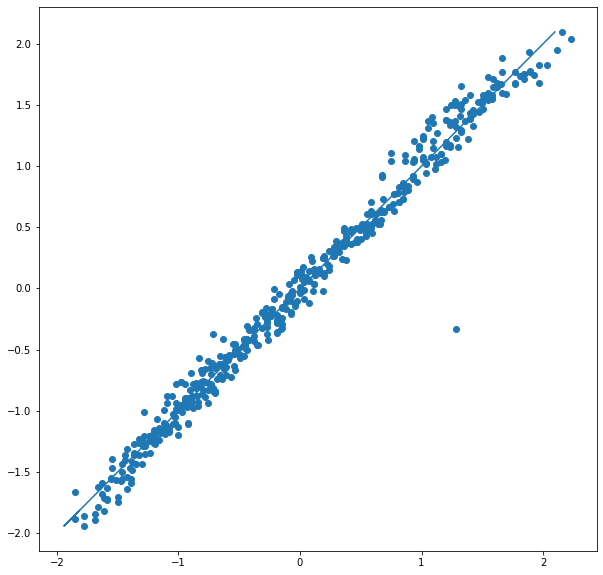

In [33]:
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show